In [25]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from matplotlib import pyplot as plt
from sklearn.tree import export_text
from sklearn.tree import plot_tree
##remember to update stuff in the loop

In [26]:
df=fetch_openml(name='adult',version=2,as_frame=True)
df=df['frame']

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             48842 non-null  float64 
 1   workclass       46043 non-null  category
 2   fnlwgt          48842 non-null  float64 
 3   education       48842 non-null  category
 4   education-num   48842 non-null  float64 
 5   marital-status  48842 non-null  category
 6   occupation      46033 non-null  category
 7   relationship    48842 non-null  category
 8   race            48842 non-null  category
 9   sex             48842 non-null  category
 10  capital-gain    48842 non-null  float64 
 11  capital-loss    48842 non-null  float64 
 12  hours-per-week  48842 non-null  float64 
 13  native-country  47985 non-null  category
 14  class           48842 non-null  category
dtypes: category(9), float64(6)
memory usage: 2.7 MB


In [28]:
df=df.drop(df[df['workclass'].isna()].index)
df=df.drop(df[df['occupation'].isna()].index)
df=df.drop(df[df['native-country'].isna()].index)

In [29]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

In [30]:
df2 = df.select_dtypes(include=[np.number])

In [31]:
df2

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,25.0,226802.0,7.0,0.0,0.0,40.0
1,38.0,89814.0,9.0,0.0,0.0,50.0
2,28.0,336951.0,12.0,0.0,0.0,40.0
3,44.0,160323.0,10.0,7688.0,0.0,40.0
5,34.0,198693.0,6.0,0.0,0.0,30.0
...,...,...,...,...,...,...
48837,27.0,257302.0,12.0,0.0,0.0,38.0
48838,40.0,154374.0,9.0,0.0,0.0,40.0
48839,58.0,151910.0,9.0,0.0,0.0,40.0
48840,22.0,201490.0,9.0,0.0,0.0,20.0


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X = df2.loc[:, 'age':'hours-per-week']
y = df['class']
# splits the data in training + testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [34]:
from sklearn.tree import DecisionTreeClassifier
# builds the classifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [35]:
tree.score(X_test, y_test)

0.7625154785069874

In [36]:
tree.score(X_train,y_train)

0.9988206156386367

In [37]:
train_res=[]
test_res=[]
for i in range(1,20):
    tree = DecisionTreeClassifier()
    tree.max_depth=i
    tree.fit(X_train, y_train)
    train_res.append(tree.score(X_train,y_train))
    test_res.append(tree.score(X_test, y_test))
    
    

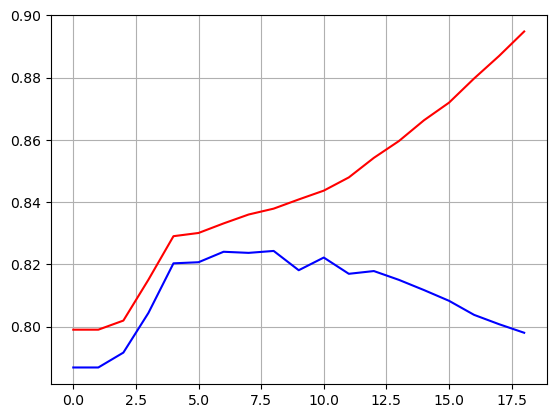

In [38]:
plt.plot(train_res,c='r')
plt.plot(test_res,c='b')
plt.grid(True)
plt.show()

In [39]:
#training with new max depth
tree.max_depth=8.6
tree.fit(X_train,y_train)
print(tree.score(X_train,y_train))
print(tree.score(X_test, y_test))

0.8360360891614578
0.8237219175658942


In [40]:
#split into 3 folds and run k-fold validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree, X_train, y_train,scoring="accuracy", cv=3)
print(scores)


[0.8315054  0.83219814 0.8247678 ]


In [41]:
train_res=[]
val_res=[]
for i in range(1,20):
    tree = DecisionTreeClassifier()
    tree.max_depth=i
    tree.fit(X_train, y_train)
    scores = cross_val_score(tree, X_train, y_train,scoring="accuracy", cv=3)
    train_res.append(tree.score(X_train,y_train))
    val_res.append(sum(scores)/3)

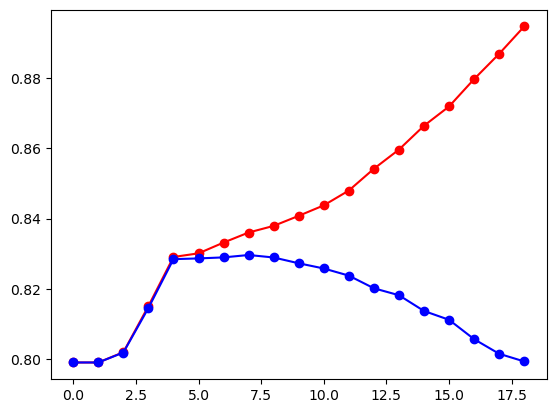

In [42]:
plt.plot(train_res,c='r')
plt.plot(train_res,'ro')
plt.plot(val_res,c='b')
plt.plot(val_res,'bo')
plt.show()

In [43]:
#Grid search
from sklearn.model_selection import GridSearchCV

# initialize decision tree classifier
dtc = DecisionTreeClassifier()

# define parameter grid
param_grid = {'max_depth': [2, 4, 6, 8, 10], 'min_samples_split': [2, 4, 6, 8, 10]}

# initialize grid search object
grid_search = GridSearchCV(dtc, param_grid, cv=3)

# fit grid search to the data
grid_search.fit(X_train, y_train)

# get the best hyperparameters and the best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'max_depth': 8, 'min_samples_split': 2}
Best score:  0.8296378739379223


In [78]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

In [89]:
#getting your categorical data
enc=OneHotEncoder()
imp=SimpleImputer()

ct=make_column_transformer((enc, ['workclass','education','marital-status','occupation','relationship','race','sex',
'native-country','class']), remainder='drop')

ct.fit_transform(df)



<45222x100 sparse matrix of type '<class 'numpy.float64'>'
	with 406998 stored elements in Compressed Sparse Row format>

In [71]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33916 entries, 39329 to 2957
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             33916 non-null  float64
 1   fnlwgt          33916 non-null  float64
 2   education-num   33916 non-null  float64
 3   capital-gain    33916 non-null  float64
 4   capital-loss    33916 non-null  float64
 5   hours-per-week  33916 non-null  float64
dtypes: float64(6)
memory usage: 1.8 MB


In [70]:
X_train.select_dtypes(include=['category','object']).columns.tolist()

[]

In [46]:
#getting your categorical data for test
enc = OneHotEncoder(handle_unknown='ignore')
X_test_cat = X_test.select_dtypes(include=[np.number])
enc.fit(X_test_cat)
enc.categories_

#transforming to array
final=enc.transform(X_test_cat).toarray()

X_test_enc = pd.DataFrame(final)
X_test_enc


,0,1,2,3,4,5,6,7,8,9,...,9731,9732,9733,9734,9735,9736,9737,9738,9739,9740
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11303,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
enc_tree = DecisionTreeClassifier()
enc_tree.fit(X_train_enc, y_train)

DecisionTreeClassifier()

In [50]:
enc_tree.score(X_train_enc,y_train)

0.9988206156386367